In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## 1. Data Source and Contents

In [26]:
# Load dataset directly from the URL
url = "https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true"
df = pd.read_csv(url)

In [27]:
#converting the features to numerical values
categorical_features = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']
df = pd.get_dummies(df, columns=categorical_features)

In [28]:
df.head()

,flag,y,hours_per_week_bin_a. 0-30,hours_per_week_bin_b. 31-40,hours_per_week_bin_c. 71-100,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,occupation_bin_a. Low,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,...,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,workclass_bin_a. no income,workclass_bin_b. income,age_bin_a. 0-25,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55
0,train,0,False,True,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
1,train,0,True,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
2,train,0,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
3,train,0,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,train,0,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False


In [29]:
x=df.drop(columns=['y','flag'])
y=df['y']

# Splitting the dataframe into training and testing sets based on the 'flag' feature
train_data = df[df['flag'] == 'train']
test_data = df[df['flag'] != 'train']

X_train = train_data.drop(columns=['y', 'flag'])
y_train = train_data['y']
X_test = test_data.drop(columns=['y', 'flag'])
y_test = test_data['y']

## 2. Finding Optimal Value of a key Ensemble Method Hyper-parameter

<Axes: >

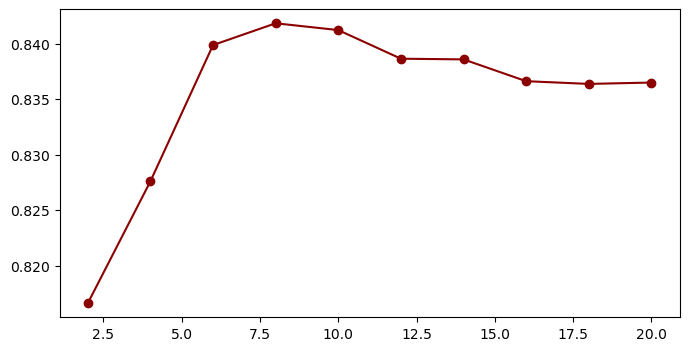

In [30]:
# Accuracy
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state = 101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(results, max_depth_options).plot(color = 'darkred', marker = 'o')

<Axes: >

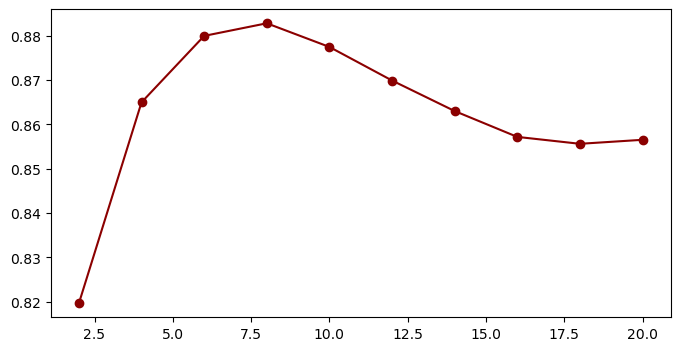

In [31]:
# AUC
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state = 101)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    results.append(auc_score)

plt.figure(figsize = (8,4))
pd.Series(results, max_depth_options).plot(color = 'darkred', marker = 'o')

## 3. Building a Random Forest Model

<Axes: >

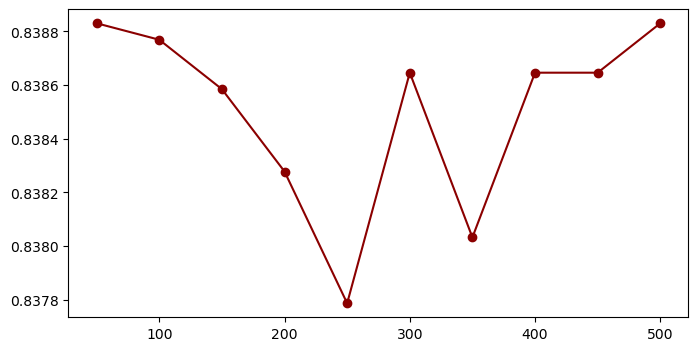

In [32]:
# Accuracy
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]
for est in num_estimators:
    model = RandomForestClassifier(n_estimators = est, random_state = 101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(results, num_estimators).plot(color = 'darkred', marker = 'o')

<Axes: >

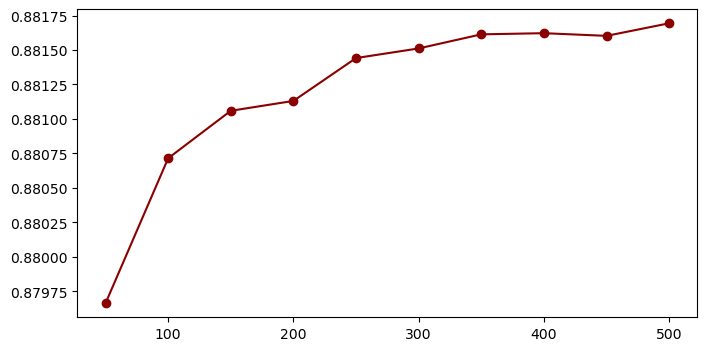

In [33]:
# AUC
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]
for est in num_estimators:
    model = RandomForestClassifier(n_estimators = est, random_state = 101)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    results.append(auc_score)

plt.figure(figsize = (8,4))
pd.Series(results, num_estimators).plot(color = 'darkred', marker = 'o')

### 1. Write your observations about the Classifier's behavior with respect to the number of estimators

With respect to Accuracy, the model performance initially decreases as number of estimators increases. Once the number of estimators passes 250, however, the model experiences a spike in performance at 300 estimators, and then a dropoff to 350 estimators. The model then experiences another increase in accuracy when the number of estimators is greater than 350.

As for AUC, the model perofrmance is consistently increasing as the number of estimators increases, tapering off around 300 estimators.

### 2. Is there an optimal value of the estimator within the given range?

Of the given range of possible number of estimators, the model experienced peak performance with respect to accuracy and AUC at **500 estimators**. When n_estimators = 500, the model accuracy was about 0.839, and the model AUC was about 0.8817.

# 4. Building AdaBoost, gradient Boost, and XGBoost Models

## AdaBoost

<Axes: >

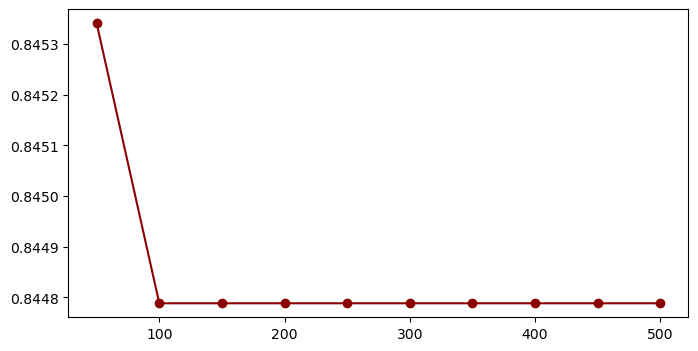

In [34]:
#ADABoost Accuracy
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]
for est in num_estimators:
    model = AdaBoostClassifier(n_estimators = est, random_state = 101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(results,num_estimators).plot(color = 'darkred', marker = 'o')

<Axes: >

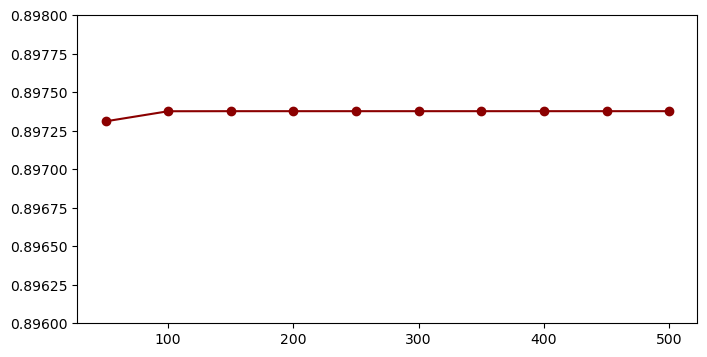

In [51]:
#ADABoost AUC
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]
for est in num_estimators:
    model = AdaBoostClassifier(n_estimators = est, random_state = 101)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    results.append(auc_score)

plt.figure(figsize = (8,4))
plt.ylim(0.896,0.898)
pd.Series(results, num_estimators).plot(color = 'darkred', marker = 'o')


### 1. Write your observations about the Classifier's behavior with respect to the number of estimators

With respect to Accuracy, the model performance initally started strong at 50 estimators, but experienced a dropoff at 100 estimators. The model then remained relatively consistent in performance as the number of estimators increased. 

For AUC, the model experienced a small increase from 50 estimators to 100 estimators, and then remained relatively consistent in performance as the number of estimators increased.

### 2. Is there an optimal value of the estimator within the given range?

Of the given range of estimators, the model experience peaked performance with respect to accuracy and AUC at **50 estimators**. When n_estimators = 50, the model accuracy was about 0.8453, and the model AUC was about 0.8973.

## Gradient Boost

<Axes: >

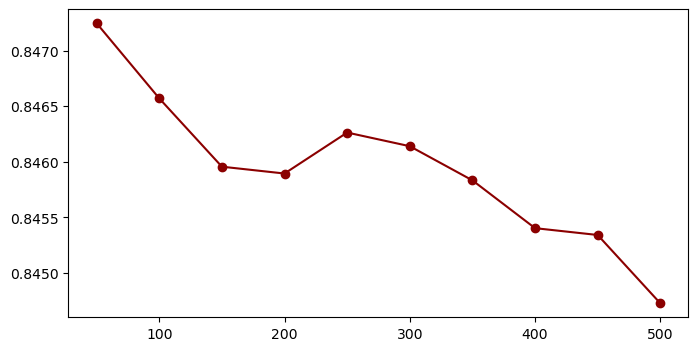

In [36]:
#Gradient Boosting Accuracy
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]
for est in num_estimators:
    model = GradientBoostingClassifier(n_estimators = est, random_state = 101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(results,num_estimators).plot(color = 'darkred', marker = 'o')

<Axes: >

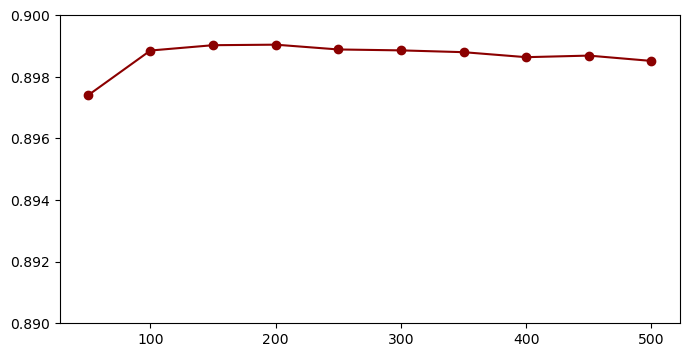

In [37]:
#Gradient Boosting AUC
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]
for est in num_estimators:
    model = GradientBoostingClassifier(n_estimators = est, random_state = 101)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    results.append(auc_score)

plt.figure(figsize = (8,4))
plt.ylim(0.89,0.9)
pd.Series(results, num_estimators).plot(color = 'darkred', marker = 'o')

### 1. Write your observations about the Classifier's behavior with respect to the number of estimators

With respect to Accuracy, the model performance initally started strong at 50 estimators, but experienced steady decrease in performance up until 200 estimators. Then the model experienced a recovery in performance at 250 estimators, and then a decrease at 300 estimators and beyond.

For AUC, the model experienced a small increase from 50 estimators to 100 estimators, and then remained relatively consistent in performance as the number of estimators increased.

### 2. Is there an optimal value of the estimator within the given range?

Of the given range of estimators, the model experience peaked performance with respect to accuracy and AUC at **100 estimators**. When n_estimators = 100, the model accuracy was about 0.8465, and the model AUC was about 0.899.

## XGBoost

In [46]:
#We have to rename some columns to avoid errors with XGBoost
# Renaming columns to remove special characters
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_test.columns]

<Axes: >

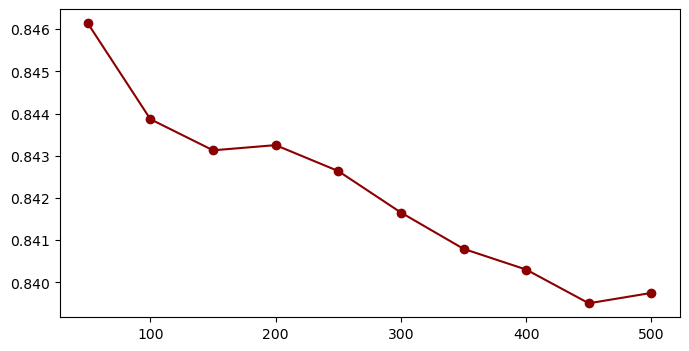

In [47]:
#XGBoost Accuracy
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]
for est in num_estimators:
    model = XGBClassifier(n_estimators = est, random_state = 101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(results,num_estimators).plot(color = 'darkred', marker = 'o')

<Axes: >

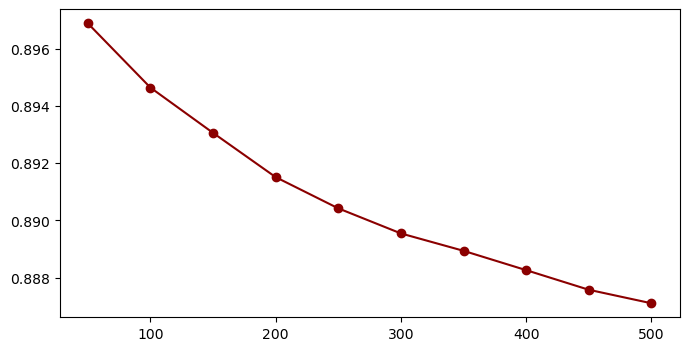

In [49]:
#XGBoost AUC
results = []
num_estimators = [50,100,150,200,250,300,350,400,450,500]
for est in num_estimators:
    model = XGBClassifier(n_estimators = est, random_state = 101)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_proba)
    results.append(auc_score)

plt.figure(figsize = (8,4))
pd.Series(results, num_estimators).plot(color = 'darkred', marker = 'o')

### 1. Write your observations about the Classifier's behavior with respect to the number of estimators

For both the Accuracy and AUC, the model experienced a steady decline in performance as the number of estimators increased.

### 2. Is there an optimal value of the estimator within the given range?

Of the given range of estimators, the model experience peaked performance with respect to accuracy and AUC at **50 estimators**. When n_estimators = 50, the model accuracy was about 0.846, and the model AUC was about 0.897.

# Compare Performances

In [ ]:
# Define a dictionary containing the data
data = {
    'Random Forest': [0.839, 0.881], #first number is Accuracy, second is AUC
    'AdaBoost': [0.8453, 0.8973],
    'Gradient Boost': [0.8470, 0.898],
    'XGB': [0.846, 0.897]
}

# Define the index 
index = ['Accuracy', 'AUC']

# Create the DataFrame
df = pd.DataFrame(data, index=index)
print(df)


          Random Forest  AdaBoost  Gradient Boost    XGB
Accuracy          0.839    0.8453           0.847  0.846
AUC               0.881    0.8973           0.898  0.897
